### Problem 1
Implement Runge-Kutta 4th order method and solve the following initial value problem:
$$y' = 5y-5ty^3, y(0) = 1$$
Compare to the exact solution:
$$y = \left(1.1e^{-10t}+t-\frac{1}{10}\right)^{-1/2}$$
Find $y(1)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(y,t):
    return 5*y-5*t*y**3

def y_true(t):
    return np.power(1.1*np.exp(-10*t)+t-0.1, -0.5)

$y_{k+1} = y_k + \frac{h}{6}(k_1+2k_2+ 2k_3+k_4)$

$k_1 = f(t_k, y_k)$

$k_2 = f(t_k+\frac{h}{2}, y_k+\frac{hk_1}{2})$

$k_3 = f(t_k+\frac{h}{2}, y_k+\frac{hk_2}{2})$

$k_4 = f(t_k+h, y_k+hk_3)$

In [3]:
def rk4(x, h):
    t, y = [0], [1]
    while t[-1] < x:
        k1 = f(y[-1], t[-1])
        k2 = f(y[-1]+h*k1/2, t[-1]+h/2)
        k3 = f(y[-1]+h*k2/2, t[-1]+h/2)
        k4 = f(y[-1]+h*k3, t[-1]+h)
        t.append(t[-1]+h)
        y.append(y[-1]+h*(k1+2*k2+2*k3+k4)/6)
    return y[-1]        

In [4]:
def err(f_true, f_appr):
    return np.abs(f_true-f_appr)

In [6]:
n = np.arange(10, 100, 10)
e = []
for i in range(len(n)):
    e.append(err(y_true(1), rk4(1, 1/n[i])))

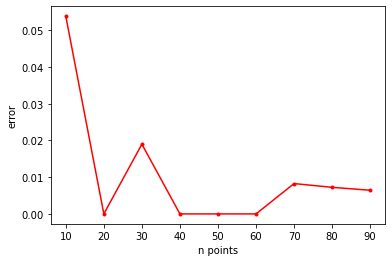

In [8]:
plt.plot(n, e, 'r.-')
plt.xlabel('n points')
plt.ylabel('error')
plt.show()

## Problem 2
Use implemented Runge-Kutta method to solve the Lotka-Volterra system:
$$x' = \alpha x - \beta xy$$
$$y' = \delta xy - \gamma y,$$
where $\alpha=0.4, \beta=0.4, \gamma=2, \delta=0.09$. Initial conditions are $x(0)=100, y(0)=8$. Find the dynamics over 50 units of time.

In [9]:
a, b, g, d = 0.01, 0.4, 2, 0.09
def f(x, t):
    return np.array([a*x[0] - b*x[0]*x[1], d*x[0]*x[1]-g*x[1]])

In [10]:
def rk4_step(x0, h):
    t = 0
    k1 = f(x0, t)
    k2 = f(x0+h*k1/2, t+h/2)
    k3 = f(x0+h*k2/2, t+h/2)
    k4 = f(x0+h*k3, t+h)
    return x0+h*(k1+2*k2+2*k3+k4)/6   

In [11]:
x, y = [20], [8]
for t in range(5000):
    x1 = rk4_step(np.array([x[-1], y[-1]]), 0.1)
    x.append(x1[0])
    y.append(x1[1])

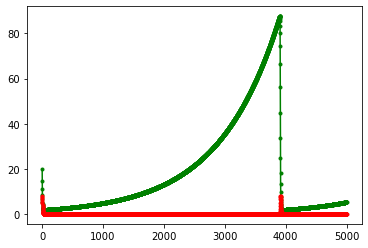

In [12]:
plt.plot(np.arange(5001), x, 'g.-', np.arange(5001), y, 'r.-')
plt.show()

### Problem 3
Implement shooting method to solve the following Boundary Value Problem:
$$\frac{d^2y}{dt^2} = \frac{3}{2}y^2, ~~ y(0)=4, y(1)=1$$

### Problem 4
Solve the same problem using matrix solution.